# Problem Set 4, Amol Surve



---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).

In [156]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn


%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from math import exp


In [157]:
from sklearn.datasets import load_boston
bdata = load_boston()

---

## Part 1: Getting oriented

Use different learning rates

### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  Interpret your results.

In [158]:
print bdata.keys()
print bdata.feature_names
print bdata.data.shape
print bdata.target.shape
print bdata.DESCR

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index 

In [159]:
data = np.column_stack((bdata.data,bdata.target))
print "Printing data shape"
print data.shape
print "\n"

#(a) regressing the housing price on the number of rooms per hous
y=data[:,13]
x=data[:,5]
#fitting the model
model1 = smf.OLS(y, sm.add_constant(x)).fit()

print "Model 1 summary"
print model1.params

print "\n"

#(b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared
print "Model 2 summary"
#Squaring and addign the column to fit the next model
data = np.column_stack((data, bdata.data[:,5]**2))
#fitting the model
model2 = smf.OLS(y, sm.add_constant(data[:, [5,14]])).fit()
print model2.params
print model1.summary()
print model2.summary()

Printing data shape
(506, 14)


Model 1 summary
[-34.67062078   9.10210898]


Model 2 summary
[ 66.05884748 -22.64326237   2.47012384]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 22 Feb 2017   Prob (F-statistic):           2.49e-74
Time:                        13:13:31   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. In

Intercept for model 1 is -34.67 and for the model 2 is 66.05; And we have two coefficients for b squared which results into the curved fit.

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 250-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 250 slope coefficients using a histogram with 25 bins, then draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?

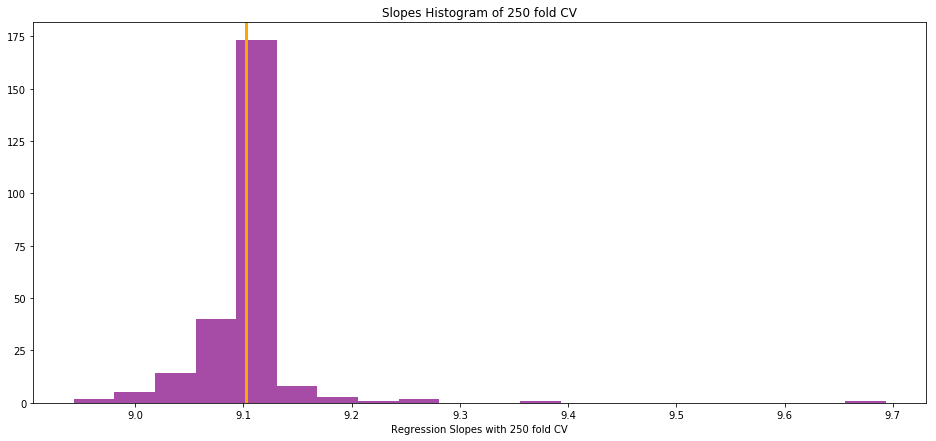

In [160]:
from sklearn.cross_validation import KFold
regressionSlopes = []
#performing k fold cross validation
kfold = KFold(len(data), n_folds= 250)

#splitting into train and test set
for train, test in kfold:
    train = data[train,:]
    test = data[test, :]
    model = smf.OLS(train[:,13], sm.add_constant(train[:,5])).fit().params[1]
    regressionSlopes.append(model)


plt.figure(figsize = (16,7))    
plot = plt.hist(regressionSlopes, bins=20, color = 'purple', alpha = 0.7)
plot1 = model1.params[1]
plt.axvline(plot1, color = 'orange', linewidth = 3)
plt.xlabel('Regression Slopes with 250 fold CV')
plt.title('Slopes Histogram of 250 fold CV')
plt.show()


The 250 fold Cross Validation mean is approximately at the same place as that of the the mean of the slopes obtained using single slope using whole data. Thus, large amount of samples can be used to represent the true population characteristics

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

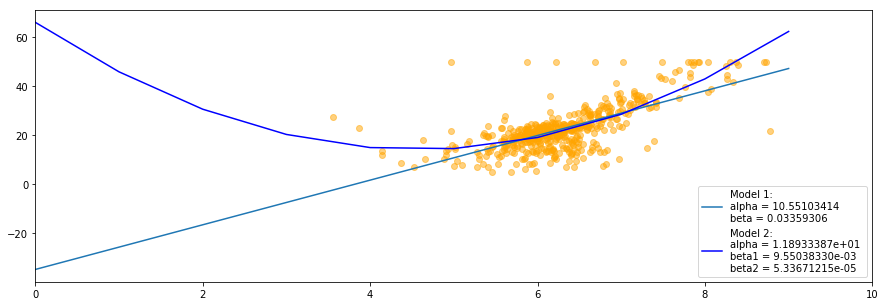

In [161]:
x1 = np.array(range(0,10))
#selecting the parameters to plot the regression on the same plot
y1 = model1.params[0] + model1.params[1]*x1
y2 = model2.params[0] + model2.params[1]*x1 + model2.params[2]*x1**2

plt.figure(figsize = (15,5))
scatterplot = plt.scatter(data[:,5], data[:,13], color = 'orange', alpha = 0.5)
plt.xlim([-5,410])

#plotting two models
model1, = plt.plot(x1, y1, linewidth = 1.5)
model2, = plt.plot(x1, y2, color = 'b', linewidth = 1.5)
plt.legend([model1, model2], ["Model 1: \nalpha = 10.55103414 \nbeta = 0.03359306", 
                              "Model 2: \nalpha = 1.18933387e+01 \nbeta1 = 9.55038330e-03 \nbeta2 = 5.33671215e-05"],
           loc = 4
          )
plt.xlim(0,10)
plt.show()

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (Average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [162]:
import time

    
"""
 Gradient descent search for linear regression.
 R is the learning rate.
 MaxIterations is the numer of updates - instead of a better definition of convergence.
 It returns intercept and coefficient for the regression
"""

def bivariate_ols(x, y, R = 0.01, MaxIterations = 1000):
    start_time = time.time()
    samples= x.shape[0] 
    # total number of samples
    x0 = np.ones(len(x))[:,np.newaxis]
    X = np.append(x0, x, axis = 1)
    theta = np.zeros(X.shape[1])
    xtranspose = X.transpose()

    for i in range(0, MaxIterations):
        #hypothesis calculaiton
        hyp = np.dot(X, theta)
        #computing the error
        error = hyp - y    
        #gradient calculations
        gradient = np.dot(xtranspose, error) / samples         
        theta = theta - R * gradient
        #final computed cost 
        computed_cost = np.sum(error ** 2) / (2 * samples)  
        hyptemp = np.dot(X, theta)
        error_temp = hyptemp - y
        #total cost over the number of samples
        total_cost = np.sum(error_temp ** 2) / (2 * samples)
        if np.abs(total_cost - computed_cost) <= 0.00000001:
            print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"    
            return theta, i


    print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"    
    return theta, i


print 'Regression co-efficients in the form (array([intercept, slope]),Number of Iterations)'

print '\n'
print 'R = 1'
print bivariate_ols(bdata.data[:,[5]], bdata.target, 1, 100000)

print '\n'
print 'R = 0.01'
print bivariate_ols(bdata.data[:,[5]], bdata.target, 0.01, 100000)

print '\n'
print 'R = 0.001'
print bivariate_ols(bdata.data[:,[5]], bdata.target, 0.001, 10000000)



Regression co-efficients in the form (array([intercept, slope]),Number of Iterations)


R = 1


/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: overflow encountered in square
/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in double_scalars
/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: overflow encountered in square
/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in subtract


Time taken: 3.88 seconds
(array([ nan,  nan]), 99999)


R = 0.01
Time taken: 1.52 seconds
(array([-34.58846886,   9.08919428]), 50406)


R = 0.001
Time taken: 14.23 seconds
(array([-34.41081105,   9.06126558]), 408337)


* R = 1, the algortihm fails to converge. since, the learning rate is high so it might start diverging.

* R = 0.01 & 0.001 algorithm converges. The leraning rate is lesser and convergence is occuring with more number of iterations.



### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [163]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [164]:
"""
 Gradient descent search for linear regression.
 R is the learning rate.
 MaxIterations is the numer of updates - instead of a better definition of convergence.
 It returns intercept and coefficient for the regression
"""
def multivariate_ols(x, y, R = 0.01, MaxIterations = 1000):
    start_time = time.time()
    samples= x.shape[0] 
    # total number of samples
    x0 = np.ones(len(x))[:,np.newaxis]
    X = np.append(x0, x, axis = 1)
    theta = np.zeros(X.shape[1])
    xtranspose = X.transpose()
    
    for i in range(0, MaxIterations):
        #hypothesis calculations
        hyp = np.dot(X, theta)
        #computing the error
        error = hyp - y    
        #gradient calculations
        gradient = np.dot(xtranspose, error) / samples     
        #finding the theta over learning rate
        theta = theta - R * gradient
        computed_cost = np.sum(error ** 2) / (2 * samples)  
        hyptemp = np.dot(X, theta)
        error_temp = hyptemp - y
        #total computed cost over the number of samples
        total_cost = np.sum(error_temp ** 2) / (2 * samples)
        if np.abs(total_cost - computed_cost) <= 0.00000001:
            print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"    
            return theta, i


    print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"    
    return theta, i

std_data = standardize(bdata.data)

print 'Regression co-efficients in the form of (array([intercept, slope1, slope2]), Number of Iterations)'

print '\nR = 0.1'
print multivariate_ols(std_data[:,[0,5]], bdata.target, 0.1, 100000)

print '\nR = 0.01'
print multivariate_ols(std_data[:,[0,5]], bdata.target, 0.01, 100000)

print '\nR = 0.001'
print multivariate_ols(std_data[:,[0,5]], bdata.target, 0.001, 100000)

Regression co-efficients in the form of (array([intercept, slope1, slope2]), Number of Iterations)

R = 0.1
Time taken: 0.01 seconds
(array([ 22.53263729,  -2.24881167,   5.89421034]), 111)

R = 0.01
Time taken: 0.08 seconds
(array([ 22.53205725,  -2.24918605,   5.89381215]), 1025)

R = 0.001
Time taken: 0.27 seconds
(array([ 22.53016521,  -2.25010969,   5.89278593]), 9046)


*Enter your observations here*

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [165]:
print 'R = 0.1'
print multivariate_ols(bdata.data[:,[0,5]], bdata.target, 0.1, 100000)

print '\nR = 0.01'
print multivariate_ols(bdata.data[:,[0,5]], bdata.target, 0.01, 100000)

print '\nR = 0.001'
print multivariate_ols(bdata.data[:,[0,5]], bdata.target, 0.001, 100000)


R = 0.1


/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: overflow encountered in square
/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: overflow encountered in square
/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in double_scalars
/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in subtract


Time taken: 2.76 seconds
(array([ nan,  nan,  nan]), 99999)

R = 0.01
Time taken: 1.78 seconds
(array([-29.21349413,  -0.26211746,   8.38382516]), 51996)

R = 0.001
Time taken: 3.12 seconds
(array([-19.55430951,  -0.29438153,   6.88254095]), 99999)


*Enter your observations here*

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Since the focus is now on prediction rather than the interpretation of the coefficients, it would be wise for you to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that in one of two ways. If you're feeling confident, use k-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or if you want to do the quick and dirty version, randomly divide your data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above. 

In [166]:
np.random.seed(200)

# standardizing features
std_data = standardize(bdata.data)
new_data = np.column_stack([std_data, bdata.target])
corss_kfold = KFold(len(new_data), n_folds= 10)

error = []
temp = []

#using k fold cross validation
for tr, ts in corss_kfold:
    #dividing into training and test data
    train_data = new_data[tr,:]
    test_data = new_data[ts,:]
    test_data = np.column_stack((np.ones(len(test_data)), test_data))
    #calculating the model output
    theta, n = multivariate_ols(train_data[:,[0,5]], train_data[:,13], 0.01, 1000000)
    theta = theta[:, np.newaxis]
    temp.append(theta.T)
    #predicting
    predictions = np.sum(np.dot(test_data[:,[0,1,6]], theta), axis = 1)
    #finding rmse
    sq_error = np.sqrt(sum((predictions - test_data[:,14])**2)/float(len(test_data)))
    error.append(sq_error )

print '\nAverage value of Theta'
print np.mean(temp, axis = 0)

Time taken: 0.13 seconds
Time taken: 0.09 seconds
Time taken: 0.06 seconds
Time taken: 0.06 seconds
Time taken: 0.04 seconds
Time taken: 0.06 seconds
Time taken: 0.04 seconds
Time taken: 0.08 seconds
Time taken: 0.18 seconds
Time taken: 0.1 seconds

Average value of Theta
[[ 22.51422053  -2.24959584   5.88688709]]


### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above and compare the actual to the predicted values for just the test instances. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?

In [167]:
testError = np.mean(error)

print testError

5.77258706027


Since, the data is linear and the linear regression model is more general and flexible compared to the Nearest Neighbors. The RMSE obtained is comparable to KNN.

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $400,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [168]:
"""
 Gradient descent search for logistic regression.
 R is the learning rate.
 MaxIterations is the numer of updates - instead of a better definition of convergence.
 It returns intercept and coefficient for the regression
"""  
def logistic_ols(x, y, R = 0.01, MaxIterations = 1000):
    start_time = time.time()
    samples= x.shape[0] 
    # total number of samples
    x0 = np.ones(len(x))[:,np.newaxis]
    X = np.append(x0, x, axis = 1)
    theta = np.zeros(X.shape[1])
    xtranspose = X.transpose()
  
    for i in range(0, MaxIterations):
        #hypothesis calculations
        hyp = np.dot(X, theta)
        #computing errors
        error = hyp - y    
        #gradient calculations over the numbe rof samples
        gradient = np.dot(xtranspose, error) / samples         
        theta = theta - R * gradient
        #computed cost over the error value and number of samples
        computed_cost = np.sum(error ** 2) / (2 * samples)  
        hyptemp = np.dot(X, theta)
        error_temp = hyptemp - y
        #finding total cost
        total_cost = np.sum(error_temp ** 2) / (2 * samples)
        if np.abs(total_cost - computed_cost) <= 0.00000001:
            print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"    
            return theta, i


    print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"    
    return theta, i


#taking log for the logistic regression to observe the log odds of the outcome
logData = bdata.data
logData = np.column_stack((logData, bdata.target))
result = []
for i in range(len(logData)):
    if logData[i,13] > 40:
        result.append(1)
    else:
        result.append(0)
logData = np.column_stack((logData, result))

logTheta, t = logistic_ols(np.log(logData[:,[0,5]]),logData[:,14], 0.1, 10000000)
print logTheta, t

Time taken: 0.73 seconds
[-1.73477406  0.01351761  0.98639393] 10965


Since we have log odds of the particular outcome, we can see completely differently coefficients in case of the logistic regression compared to linear  model.

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have *K+K^2/2* features. Standardize all of your features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [169]:
added_data = std_data

for i in range(std_data.shape[1] ):
    for j in range(i, std_data.shape[1]):
        if i != j:
            x = new_data[:,i] * new_data[:,j]
            added_data = np.column_stack((added_data, x))

added_data = standardize(added_data)
added_data = np.column_stack((added_data, bdata.target))

np.random.shuffle(added_data)


training_data = added_data[:66*len(added_data)/100]
test_data = added_data[66*len(added_data)/100:]

test_data = np.column_stack((np.ones(len(test_data)), test_data))

### 4.2 Let's overfit!
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those *K+K/2* features as you can.  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [170]:
theta, n = multivariate_ols(training_data[:,0:25], training_data[:,91], 0.05, 1000000)
theta = theta[:, np.newaxis]

print 'The co-efficient for the model with 25 variables'
print theta.T, n

pred = np.sum(np.dot(test_data[:, 0:26], theta), axis = 1)
r = np.sqrt(sum((pred - test_data[:,92])**2)/float(len(test_data)))

print '\n RMSE on test'
print r

training_new = np.column_stack((np.ones(len(training_data)), training_data))
pred = np.sum(np.dot(training_new[:, 0:26], theta), axis = 1)
r = np.sqrt(sum((pred - training_new[:,92])**2)/float(len(training_new )))

print '\nRMSE on train'
print r

Time taken: 27.26 seconds
The co-efficient for the model with 25 variables
[[ 22.69184961  21.51240929  19.81715748   5.28438866   1.19889921
   -2.52998634   3.25359117  -0.66493264  -6.81969901  -2.42728919
   -2.93149122   2.13579504   1.2101062   -3.67803143  26.39627509
   11.00256745   0.85233863  -1.20365335  -1.28716461  -0.9381072
   -9.99550412 -21.49744518  -3.68457365   7.239799    -0.71894202
    0.22681944]] 557939

 RMSE on test
4.19769210689

RMSE on train
4.35169093537


RMSE obtained on test is 3.8 while on train is 4.03 which implies the effect of overfitting since even after computing with 25 variables, the model performs poorly on test data but improves on training data.

### 4.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 3.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [171]:
def ridge_regularization(x_matrix, yvalues, R=0.01, MaxIterations=1000, lam = 0.001):
    start_time = time.time()
    N = float(len(yvalues))
    X = x_matrix
    Y = yvalues.T
    
    beta = np.repeat(0, X.shape[1]).T
    alpha = 0
    beta_x = np.dot(beta.T, X.T).T
    error_sq = np.square((alpha + beta_x - Y))
    cost = 1/(2*N) * sum(error_sq)
    
    while MaxIterations > 0:
        beta_x_new = np.dot(beta.T, X.T).T
        error_new = (alpha + beta_x_new - Y)
        alpha_new = alpha - R/N * sum(error_new)
        beta_new = beta*(1-R*lam/N) - R/N * np.dot(X.T, error_new).T
        error_new2_sq = np.square(alpha_new + beta_x_new - Y)
        J = 1/(2*N)*sum(error_new2_sq)
        if np.abs(J - cost) <= 0.0000001:
            beta = beta_new 
            alpha = alpha_new
            print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"
            return alpha, beta
        else:
            beta = beta_new 
            alpha = alpha_new
            cost = J
            MaxIterations = MaxIterations - 1
        
    print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"    
    return alpha, beta

print 'Ridge regularization coefficients are '

print ridge_regularization(train_66[:,0:91], train_66[:,91], 0.01, 10000000, 6)

Ridge regularization coefficients are 
Time taken: 2.82 seconds
(22.499484408484435, array([-0.41906586, -0.1604191 , -0.31437319,  0.51499543, -1.18529596,
        3.09814414, -0.9421666 , -2.77363555,  0.82733138, -1.78125489,
       -0.33743578,  1.42210175, -3.24566553,  0.54852379, -0.01047982,
        0.5887084 , -0.91858509,  1.12302647,  0.18680057, -0.82741274,
       -0.82390924,  0.06274772, -0.40003249, -0.39905112,  1.74865406,
       -0.08814204,  0.03891157,  0.51224369,  0.08386066, -0.21568586,
        0.27538632,  0.03472606,  0.36990811, -0.40496871,  0.13384473,
       -0.70119671,  0.40817654,  0.90776759,  0.09013212,  0.42864038,
       -0.14307749, -0.62371142, -0.30077678, -0.7964583 ,  0.21675916,
       -0.39140329, -1.02375567, -0.38521789,  0.32220386, -0.07221377,
       -0.37595906,  0.46131603,  0.05973266,  0.47485068, -0.22537318,
        0.27490364, -1.22888673,  0.31412868, -0.93937566,  0.24772635,
       -0.15875054,  0.1653842 ,  0.74114931, -0.55

RMSE obtained in previous model is 5.77 while here it's in the range of 3 which implies that the model is avoiding overfitting.

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a scatter plot that shows RMSE as a function of lambda.

Time taken: 0.33 seconds
Time taken: 0.34 seconds
Time taken: 0.36 seconds
Time taken: 0.38 seconds
Time taken: 0.57 seconds
Time taken: 0.52 seconds
Time taken: 1.06 seconds
Time taken: 1.42 seconds
Time taken: 1.52 seconds
Time taken: 1.83 seconds
Time taken: 4.11 seconds
Time taken: 4.81 seconds
Time taken: 5.92 seconds
Time taken: 5.52 seconds
Time taken: 10.04 seconds
Time taken: 25.68 seconds
Time taken: 49.3 seconds
Time taken: 55.36 seconds
Time taken: 50.06 seconds
Time taken: 52.24 seconds

Mean RMSE is :
3.44847192564


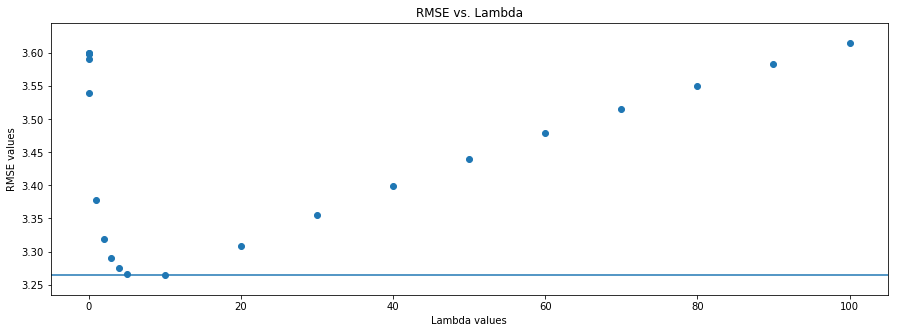


Minimum RMSE value:
3.26426710319


In [172]:
error = []
#list of different values of lambda to check for the optimal value.
values = [100,90,80,70,60,50,40,30,20,10,5,4,3,2,1, 0.1 ,0.01,0.001, 0.0001, 0.00001]

for i in values:
    #applying the ridge regularization function
    alpha, beta = ridge_regularization(training_data[:,0:91], training_data[:,91], 0.01, 10000000, i)
    #predictions on test dataset
    predictions = alpha + np.sum(np.dot(test_data[:,1:92], beta[:,np.newaxis]), axis = 1)
    result = np.sqrt(sum((predictions - test_data[:,92])**2)/float(len(test_data)))
    error.append(result)

print '\nMean RMSE is :'
print np.mean(error)
#plotting the results
plt.figure(figsize=(15,5))
p = plt.scatter(values,error)
plt.xlabel('Lambda values')
plt.ylabel('RMSE values')
plt.title('RMSE vs. Lambda')
plt.axhline(np.min(error))
plt.show()
print '\nMinimum RMSE value:'
print np.min(error)

WE obtain the minimum RMSE at around lambda between 5 to 7. IF we increase the lambda above or below that range, the model fits badly on the data and you can see the increase in the RMSE value.

### (Showoff) Extra Credit 3: Lambda and coefficients

If you're feeling extra-special, create a parameter plot that shows how the different coefficient estimates change as a function of lambda. To make this graph intelligible, only include the *K* original F_s features in this plot

In [173]:
# Your code here

*Discuss your results here*